In [1]:
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np

import cartopy.crs as ccrs
import cartopy.mpl.ticker as cticker
from cartopy.util import add_cyclic_point

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

using Nion1+2 index which indicates the extreme Eastern Tropical Pacific SST (0-10S, 90W-80W) anomaly
###Because my data doesn't match the period of data from NOAA website and I would like to see the relationship between this my global SST data and nino1+2 index, I use my data for both creating Nino1+2 anomaly and building composit maps.

In [2]:
path='/groups/XDU5/CMIP6_PMIP4/CESM2/piControl/'
file='merged.nc'

In [3]:
ds = xr.open_dataset(path+file)
ds

<xarray.Dataset> Size: 933MB
Dimensions:    (time: 3600, bnds: 2, lon: 360, lat: 180)
Coordinates:
  * time       (time) object 29kB 0001-01-15 13:00:00 ... 0300-12-15 12:00:00
  * lon        (lon) float64 3kB 0.5 1.5 2.5 3.5 4.5 ... 356.5 357.5 358.5 359.5
  * lat        (lat) float64 1kB -89.5 -88.5 -87.5 -86.5 ... 86.5 87.5 88.5 89.5
Dimensions without coordinates: bnds
Data variables:
    time_bnds  (time, bnds) object 58kB ...
    lon_bnds   (lon, bnds) float64 6kB ...
    lat_bnds   (lat, bnds) float64 3kB ...
    tos        (time, lat, lon) float32 933MB ...
Attributes: (12/44)
    CDI:                    Climate Data Interface version 1.9.10 (https://mp...
    source:                 CESM2 (2017): atmosphere: CAM6 (0.9x1.25 finite v...
    institution:            National Center for Atmospheric Research
    Conventions:            CF-1.7 CMIP-6.2
    activity_id:            ISMIP6
    branch_method:          no parent
    ...                     ...
    tracking_id:            hdl:21.14100/5b4f3620-4efa-4fc4-a257-421bd31448b9
    variable_id:            tos
    variant_info:           CMIP6 ISMIP6 CESM2 piControl-withism experiment w...
    variant_label:          r1i1p1f1
    history:                Sun Sep 08 20:46:50 2024: cdo mergetime tos_Omon_...
    CDO:                    Climate Data Operators version 1.9.10 (https://mp...

In [4]:
#getting the last 200 years that reaches almost the equilibrium state in the simulation
ds_200 = ds.sel(time=slice("0100-12-15 13:00:00", "0300-12-15 13:00:00"))
ds_200

<xarray.Dataset> Size: 622MB
Dimensions:    (time: 2400, bnds: 2, lon: 360, lat: 180)
Coordinates:
  * time       (time) object 19kB 0101-01-15 12:00:00 ... 0300-12-15 12:00:00
  * lon        (lon) float64 3kB 0.5 1.5 2.5 3.5 4.5 ... 356.5 357.5 358.5 359.5
  * lat        (lat) float64 1kB -89.5 -88.5 -87.5 -86.5 ... 86.5 87.5 88.5 89.5
Dimensions without coordinates: bnds
Data variables:
    time_bnds  (time, bnds) object 38kB ...
    lon_bnds   (lon, bnds) float64 6kB ...
    lat_bnds   (lat, bnds) float64 3kB ...
    tos        (time, lat, lon) float32 622MB ...
Attributes: (12/44)
    CDI:                    Climate Data Interface version 1.9.10 (https://mp...
    source:                 CESM2 (2017): atmosphere: CAM6 (0.9x1.25 finite v...
    institution:            National Center for Atmospheric Research
    Conventions:            CF-1.7 CMIP-6.2
    activity_id:            ISMIP6
    branch_method:          no parent
    ...                     ...
    tracking_id:            hdl:21.14100/5b4f3620-4efa-4fc4-a257-421bd31448b9
    variable_id:            tos
    variant_info:           CMIP6 ISMIP6 CESM2 piControl-withism experiment w...
    variant_label:          r1i1p1f1
    history:                Sun Sep 08 20:46:50 2024: cdo mergetime tos_Omon_...
    CDO:                    Climate Data Operators version 1.9.10 (https://mp...

In [5]:
ds_climo = ds_200.groupby('time.month').mean()
ds_anoms = ds_200.groupby('time.month')-ds_climo
ds_anoms

<xarray.Dataset> Size: 643MB
Dimensions:   (time: 2400, lon: 360, lat: 180, bnds: 2)
Coordinates:
  * time      (time) object 19kB 0101-01-15 12:00:00 ... 0300-12-15 12:00:00
  * lon       (lon) float64 3kB 0.5 1.5 2.5 3.5 4.5 ... 356.5 357.5 358.5 359.5
  * lat       (lat) float64 1kB -89.5 -88.5 -87.5 -86.5 ... 86.5 87.5 88.5 89.5
    month     (time) int64 19kB 1 2 3 4 5 6 7 8 9 10 ... 3 4 5 6 7 8 9 10 11 12
Dimensions without coordinates: bnds
Data variables:
    lon_bnds  (time, lon, bnds) float64 14MB 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0
    lat_bnds  (time, lat, bnds) float64 7MB 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0
    tos       (time, lat, lon) float32 622MB nan nan nan ... -0.003111 -0.003129

In [6]:
#creating Niño1+2 index
nino12 = ds_anoms.sel(lat=slice(-10,0), lon=slice(360-90,360-80)) #, method='nearest'
nino12 = nino12.mean(dim=["lon", "lat"])
nino12

<xarray.Dataset> Size: 125kB
Dimensions:   (time: 2400, bnds: 2)
Coordinates:
  * time      (time) object 19kB 0101-01-15 12:00:00 ... 0300-12-15 12:00:00
    month     (time) int64 19kB 1 2 3 4 5 6 7 8 9 10 ... 3 4 5 6 7 8 9 10 11 12
Dimensions without coordinates: bnds
Data variables:
    lon_bnds  (time, bnds) float64 38kB 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0
    lat_bnds  (time, bnds) float64 38kB 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0
    tos       (time) float32 10kB 0.391 0.2106 0.04018 ... -0.133 0.1491

In [7]:
#creating El Niño, La Niña, and Neutral years
elnino=nino12["tos"].where(nino12["tos"]>0.5)
lanina=nino12["tos"].where(nino12["tos"]<-0.5)
neutral=nino12["tos"].where(np.logical_and(nino12["tos"]>=-0.5, nino12["tos"]<=0.5))

counts=[elnino.count(dim='time').values,
        lanina.count(dim='time').values,
        neutral.count(dim='time').values]
print(counts)

[array(603), array(717), array(1080)]


In [8]:
#getting global SST within nino12 period (For practice, I don't skip this part even though I already this SST data)
sst = ds.tos.sel(time=slice(nino12['time'][0], nino12['time'][-1]))
sst_climo = sst.groupby('time.month').mean()
sst_anoms = sst.groupby('time.month')-sst_climo
sst_anoms

<xarray.DataArray 'tos' (time: 2400, lat: 180, lon: 360)> Size: 622MB
array([[[        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        ...,
        [-0.00800836, -0.00803387, -0.0080657 , ..., -0.0079453 ,
         -0.00796759, -0.00798774],
        [-0.00927591, -0.00929523, -0.00931668, ..., -0.00923073,
         -0.00924337, -0.00925863],
        [-0.00982714, -0.00983834, -0.00984812, ..., -0.009794  ,
         -0.00980473, -0.00981641]],

       [[        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
...
        [-0.00335741, -0.00338554, -0.00341558, ..., -0.00329006,
         -0.00331128, -0.00333345],
        [-0.00375414, -0.0037744 , -0.00379622, ..., -0.00369871,
         -0.00371706, -0.0037353 ],
        [-0.00378513, -0.00379801, -0.00381219, ..., -0.00375199,
         -0.0037626 , -0.00377321]],

       [[        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        ...,
        [-0.00234938, -0.00236213, -0.00237989, ..., -0.00232613,
         -0.00233293, -0.00233936],
        [-0.00270593, -0.00272572, -0.00274634, ..., -0.00265849,
         -0.00267398, -0.00268853],
        [-0.00314546, -0.00316608, -0.00318813, ..., -0.00309551,
         -0.003111  , -0.00312865]]], dtype=float32)
Coordinates:
  * time     (time) object 19kB 0101-01-15 12:00:00 ... 0300-12-15 12:00:00
  * lon      (lon) float64 3kB 0.5 1.5 2.5 3.5 4.5 ... 356.5 357.5 358.5 359.5
  * lat      (lat) float64 1kB -89.5 -88.5 -87.5 -86.5 ... 86.5 87.5 88.5 89.5
    month    (time) int64 19kB 1 2 3 4 5 6 7 8 9 10 ... 3 4 5 6 7 8 9 10 11 12

In [9]:
#getting composits
elnino_sst = sst_anoms.sel(time=elnino.dropna(dim='time')['time']).mean(dim='time')
lanina_sst = sst_anoms.sel(time=lanina.dropna(dim='time')['time']).mean(dim='time')
neutral_sst = sst_anoms.sel(time=neutral.dropna(dim='time')['time']).mean(dim='time')

comp_sst = [elnino_sst,lanina_sst,neutral_sst]
comp_sst

[<xarray.DataArray 'tos' (lat: 180, lon: 360)> Size: 259kB
 array([[        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        ...,
        [-0.0013491 , -0.00134422, -0.00133903, ..., -0.00135919,
         -0.00135643, -0.00135316],
        [-0.00108017, -0.00107594, -0.0010714 , ..., -0.00108963,
         -0.00108688, -0.00108359],
        [-0.0009113 , -0.00090722, -0.0009028 , ..., -0.00092279,
         -0.00091923, -0.00091549]], dtype=float32)
 Coordinates:
   * lon      (lon) float64 3kB 0.5 1.5 2.5 3.5 4.5 ... 356.5 357.5 358.5 359.5
   * lat      (lat) float64 1kB -89.5 -88.5 -87.5 -86.5 ... 86.5 87.5 88.5 89.5,
 <xarray.DataArray 'tos' (lat: 180, lon: 360)> Size: 259kB
 array([[       nan,        nan,        nan, ...,        nan,     

Text(0.5, 0.75, 'Composite SST Anomalies during ENSO')

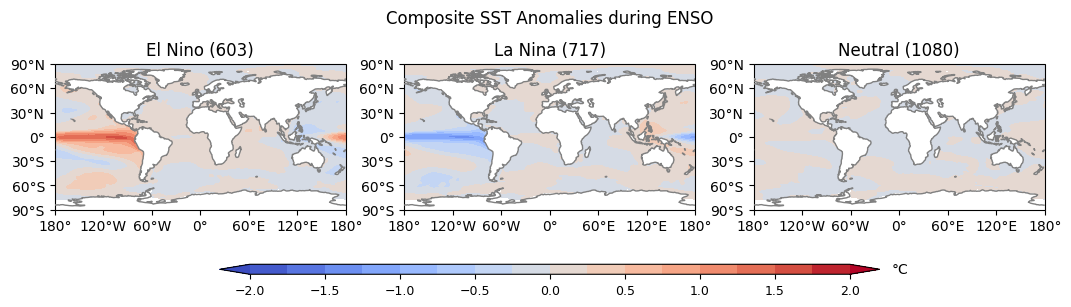

In [10]:
#plotting composit sst
labels=['El Nino', 'La Nina', 'Neutral']
clevs = np.arange(-2,2.1,0.25)

# Define the figure and each axis for the 3 rows and 3 columns
fig, axs = plt.subplots(nrows=1,ncols=3,
                        subplot_kw={'projection': ccrs.PlateCarree()},
                        figsize=(11,5))

axs = axs.flatten()

for i,enso in enumerate(comp_sst):

        # Select the season
        data = comp_sst[i]

        # Add the cyclic point
        data,lons = add_cyclic_point(data,coord=comp_sst[i]['lon'])

        # Contour plot
        cs=axs[i].contourf(lons,comp_sst[i]['lat'],data,clevs,
                          transform = ccrs.PlateCarree(),
                          cmap='coolwarm',extend='both')

       # Longitude labels
        axs[i].set_xticks(np.arange(-180,181,60), crs=ccrs.PlateCarree())
        lon_formatter = cticker.LongitudeFormatter()
        axs[i].xaxis.set_major_formatter(lon_formatter)

        # Latitude labels
        axs[i].set_yticks(np.arange(-90,91,30), crs=ccrs.PlateCarree())
        lat_formatter = cticker.LatitudeFormatter()
        axs[i].yaxis.set_major_formatter(lat_formatter)

        
        # Title each subplot with the name of the season
        axs[i].set_title(labels[i]+' ('+str(counts[i])+')')

        # Draw the coastines for each subplot
        axs[i].coastlines(zorder=3, color='grey')
        
# Adjust the location of the subplots 
# on the page to make room for the colorbar
fig.subplots_adjust(bottom=None, top=None, left=0.05, right=0.95,
                    wspace=0.2, hspace=0.5)

# Add a colorbar axis at the bottom of the graph
cbar_ax = fig.add_axes([0.2, 0.22, 0.6, 0.02])

# Draw the colorbar
cbar=fig.colorbar(cs, cax=cbar_ax,orientation='horizontal',label=None)
#cbar.ax.set_aspect(0.01)
cbar.ax.tick_params(labelsize=9) 
cbar_ax.text(1.07,0.1,"\u00b0C", transform=cbar.ax.transAxes)

# Add a big title at the top
plt.suptitle('Composite SST Anomalies during ENSO', y=0.75)

In [11]:
diff_sst=[elnino_sst-neutral_sst, 
             lanina_sst-neutral_sst]

Text(0.5, 0.92, 'Composite SST Differences during ENSO')

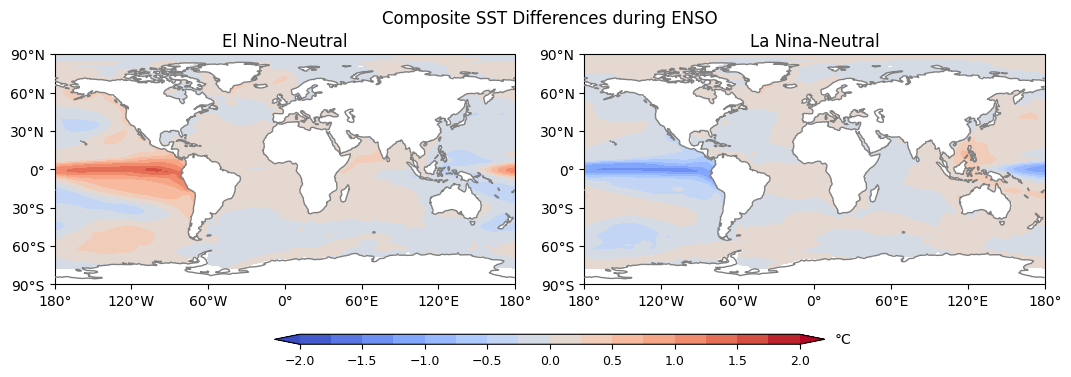

In [12]:
labels=['El Nino-Neutral','La Nina-Neutral']
clevs=np.arange(-2,2.1,0.25)

# Define the figure and each axis for the 1 row and 2 columns
fig, axs = plt.subplots(nrows=1,ncols=2,
                        subplot_kw={'projection': ccrs.PlateCarree()},
                        figsize=(11,5))

# axs is a 2 dimensional array of `GeoAxes`.  
# We will flatten it into a 1-D array
axs = axs.flatten()

#Loop over all of the seasons and plot
for i,enso in enumerate(diff_sst):

        # Select the season
        data = diff_sst[i]

        # Add the cyclic point
        data,lons = add_cyclic_point(data,coord=diff_sst[i]['lon'])

        # Contour plot
        cs = axs[i].contourf(lons,diff_sst[i]['lat'],data,clevs,
                          transform=ccrs.PlateCarree(),
                          cmap='coolwarm',extend='both')

        # Longitude labels
        axs[i].set_xticks(np.arange(-180,181,60), crs=ccrs.PlateCarree())
        lon_formatter = cticker.LongitudeFormatter()
        axs[i].xaxis.set_major_formatter(lon_formatter)

        # Latitude labels
        axs[i].set_yticks(np.arange(-90,91,30), crs=ccrs.PlateCarree())
        lat_formatter = cticker.LatitudeFormatter()
        axs[i].yaxis.set_major_formatter(lat_formatter)

        
        # Title each subplot with the name of the season
        axs[i].set_title(labels[i])

        # Draw the coastines for each subplot
        axs[i].coastlines(zorder=3, color='grey')
        
# Adjust the location of the subplots 
# on the page to make room for the colorbar
fig.subplots_adjust(bottom=0.3, top=0.9, left=0.05, right=0.95,
                    wspace=0.15, hspace=0.5)

# Add a colorbar axis at the bottom of the graph
cbar_ax = fig.add_axes([0.25, 0.25, 0.5, 0.02])

# Draw the colorbar
cbar = fig.colorbar(cs, cax=cbar_ax,orientation='horizontal',label=None)
cbar.ax.tick_params(labelsize=9) 
cbar_ax.text(1.07,0.1,"\u00b0C", transform=cbar.ax.transAxes)
# Add a big title at the top
plt.suptitle('Composite SST Differences during ENSO', y=0.92)

In [13]:
#C, or 5%

from scipy.stats import ttest_ind
elnino_sst_vals = sst_anoms.sel(time=elnino.dropna(dim='time')['time'])
lanina_sst_vals = sst_anoms.sel(time=lanina.dropna(dim='time')['time'])
neutral_sst_vals = sst_anoms.sel(time=neutral.dropna(dim='time')['time'])

In [14]:
tstat,pval = ttest_ind(elnino_sst_vals, 
                neutral_sst_vals, 
                equal_var = False)

In [15]:
#making a mask
p = 0.05
mask_diff = diff_sst[0].where(pval <= p)
mask_diff

<xarray.DataArray 'tos' (lat: 180, lon: 360)> Size: 259kB
array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]], dtype=float32)
Coordinates:
  * lon      (lon) float64 3kB 0.5 1.5 2.5 3.5 4.5 ... 356.5 357.5 358.5 359.5
  * lat      (lat) float64 1kB -89.5 -88.5 -87.5 -86.5 ... 86.5 87.5 88.5 89.5

Text(0.5, 0.92, 'Composite SST Differences')

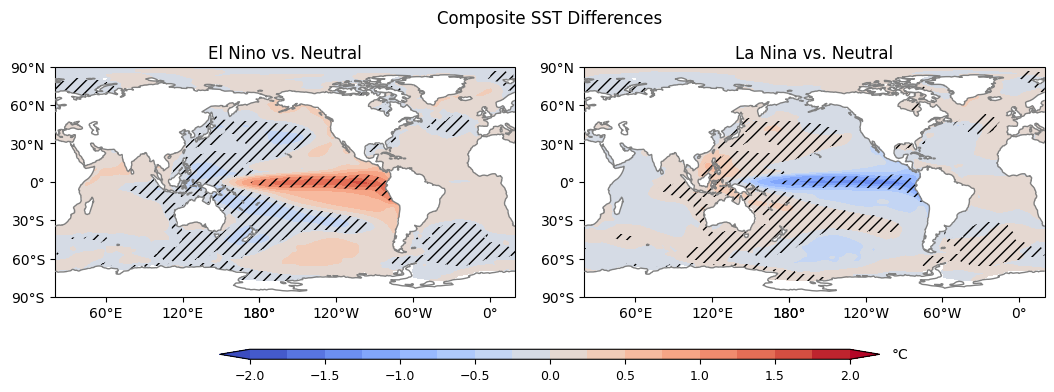

In [19]:
labels=["El Nino vs. Neutral", "La Nina vs. Neutral"]
clevs=np.arange(-2,2.1,0.25)
hatch_levs=[0]

# Define the figure and each axis for the 2 rows and 1 columns
fig, axs = plt.subplots(nrows=1,ncols=2,
                        subplot_kw={'projection': ccrs.PlateCarree(central_longitude=200.0)}, figsize=(11,5))

#Loop over all of the seasons and plot
for i,enso in enumerate(diff_sst):
    data=diff_sst[i]

    # Add the cyclic point
    data,lons=add_cyclic_point(data,coord=diff_sst[i]['lon'])
    mask_data,lons=add_cyclic_point(mask_diff,coord=diff_sst[i]['lon'])

    # Contour plot
    cs=axs[i].contourf(lons,diff_sst[i]['lat'],data,clevs,
                transform = ccrs.PlateCarree(),
                cmap='coolwarm',extend='both')

    # Overlay of stippling
    ss=axs[i].contourf(lons,diff_sst[i]['lat'],mask_data,[0,1],
                transform = ccrs.PlateCarree(),colors=['None'],
                hatches=['///',''],extend='both',alpha=0.0)
    
    # Longitude labels
    axs[i].set_xticks(np.arange(-180,181,60), crs=ccrs.PlateCarree())
    lon_formatter = cticker.LongitudeFormatter()
    axs[i].xaxis.set_major_formatter(lon_formatter)

    # Latitude labels
    axs[i].set_yticks(np.arange(-90,91,30), crs=ccrs.PlateCarree())
    lat_formatter = cticker.LatitudeFormatter()
    axs[i].yaxis.set_major_formatter(lat_formatter)
    
    # Title each subplot with the name of the season
    axs[i].set_title(labels[i])

    # Draw the coastines for each subplot
    axs[i].coastlines(zorder=3, color='grey')
        
# Adjust the location of the subplots 
# on the page to make room for the colorbar
fig.subplots_adjust(bottom=0.25, top=0.9, left=0.05, right=0.95,
                    wspace=0.15, hspace=0.5)

# Add a colorbar axis at the bottom of the graph
cbar_ax = fig.add_axes([0.2, 0.22, 0.6, 0.02])

# Draw the colorbar
cbar = fig.colorbar(cs,cax=cbar_ax,orientation='horizontal',label=None)
cbar.ax.tick_params(labelsize=9) 
cbar_ax.text(1.07,0.1,"\u00b0C", transform=cbar.ax.transAxes)

# Add a big title at the top
plt.suptitle("Composite SST Differences", y=0.92)

#plt.savefig('stats_ttest.png')